# pandas: powerful Python data analysis toolkit

>Pandas is a powerful module that is optimized on top of Numpy and provides a set of data structures particularly suited to time-series and spreadsheet-style data analysis (think of pivot tables in Excel). If you are familiar with the R statistical package, then you can think of Pandas as providing a Numpy-powered dataframe for Python.

... it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Following: https://github.com/deniederhut/Pandas-Tutorial-SciPyConf-2018

import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [79]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (6, 5)

#### Reading Data

In [4]:
flights = pd.read_csv("../extras/sample_data//ny-flights.csv.gz",
                      parse_dates=["fl_date", "arr", "dep"],)
flights

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.00,-8.00,"1,014.00",-26.00,0.00,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,"1,347.00",2.00,"1,706.00",1.00,0.00,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.00,-4.00,908.00,4.00,0.00,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,"1,522.00",-10.00,"1,649.00",-31.00,0.00,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.00,-6.00,"1,006.00",-20.00,0.00,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.00,7.00,"1,156.00",-6.00,0.00,2014-01-31 11:56:00,2014-01-31 08:52:00


The CSV includes all the flights from New York airports in January 2014.
Each record has information about a single flight including the carrier, tail number, origin, destination, and delays.

A dataframe is made up of data, row labels, and column labels.
- `read_csv` returned a `DataFrame`, which is somewhat similar to a spreadsheet or database table.
- `pd.DataFrame` is the data container you'll work most with.
- Each column of the data is a `pd.Series`, kind of like a 1-dimensional version of a DataFrame.

In [5]:
flights['dep_delay']

0        14.00
1        -3.00
2         2.00
3        -8.00
4         2.00
         ...  
20812    -4.00
20813   -10.00
20814    -6.00
20815     7.00
20816   -12.00
Name: dep_delay, Length: 20817, dtype: float64

Both `pd.DataFrame`s and `pd.Series` have *row labels*, which can be accessed with the `.index` attribute:

In [6]:
flights.index

RangeIndex(start=0, stop=20817, step=1)

In [7]:
flights['dep_delay'].index

RangeIndex(start=0, stop=20817, step=1)

`flights.index` is a `pd.Index` (there are many specialized index types, like `pd.RangeIndex`, but we'll talk about those later).

DataFrames store their column labels in a `.columns` attribute, which is also a `pd.Index`:

In [8]:
flights.columns

Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')

The row and column labels help out with indexing and alignemnt, our firs two topics.

#### Pandas and NumPy

Pandas builds on top of NumPy. A DataFrame is a *container* for arrays.

The major differences are that

1. **Pandas DataFrames are 2-dimensional**:

   Pandas is designed for *tabular* data, like you might find in a
   database table, spreadsheet, or CVS. This differs from NumPy, which
   supports N-dimensional arrays.


2. **Pandas DataFrames are heterogenous**:

   You can store many types of data in the same DataFrame. Each *column*
   of the dataframe has its own type. This differs NumPy, which has
   *homogeneous* arrays: a single datatype for every element of the
   N-dimensional array.

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
fl_date           20817 non-null datetime64[ns]
unique_carrier    20817 non-null object
airline_id        20817 non-null int64
tail_num          20512 non-null object
fl_num            20817 non-null int64
origin            20817 non-null object
dest              20817 non-null object
dep_time          18462 non-null float64
dep_delay         18462 non-null float64
arr_time          18412 non-null float64
arr_delay         18383 non-null float64
cancelled         20817 non-null float64
arr               18412 non-null datetime64[ns]
dep               18462 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(4)
memory usage: 2.2+ MB


In [10]:
flights.describe()

,airline_id,fl_num,dep_time,dep_delay,arr_time,arr_delay,cancelled
count,"20,817.00","20,817.00","18,462.00","18,462.00","18,412.00","18,383.00","20,817.00"
mean,"20,109.61","1,826.10","1,319.99",22.77,"1,493.70",21.38,0.12
std,370.72,"1,548.19",480.00,59.77,518.85,64.61,0.32
min,"19,393.00",1.00,1.00,-112.00,1.00,-112.00,0.00
25%,"19,790.00",472.00,858.00,-4.00,"1,110.75",-12.00,0.00
50%,"20,355.00","1,457.00","1,336.00",0.00,"1,519.00",3.00,0.00
75%,"20,409.00","2,701.00","1,720.00",22.00,"1,923.00",28.00,0.00
max,"21,171.00","6,258.00","2,400.00",973.00,"2,400.00",996.00,1.00


### Indexing

There are many ways you might want to specify which subset you want to select:

- Like lists, you can index by integer position.
- Like dictionaries, you can index by label.
- Like NumPy arrays, you can index by boolean masks.
- You can index with a scalar, `slice`, or array
- Any of these should work on the index (row labels), or columns of a DataFrame, or both
- And any of these should work on hierarchical indexes.

#### The Basic Rules

1. Use `__getitem__` (square brackets) to select columns of a `DataFrame`

    ```python
    >>> df[['a', 'b', 'c']]
    ```

2. Use `.loc` for label-based indexing (rows and columns)

    ```python
    >>> df.loc[row_labels, column_labels]
    ```

3. Use `.iloc` for position-based indexing (rows and columns)

    ```python
    >>> df.iloc[row_positions, column_positions]
    ```

Let's get a DataFrame with a labeled index by selecting the
first flight for each carrier. We'll talk about `groupby` later.

In [11]:
first = flights.groupby("unique_carrier").first()
first

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
EV,2014-01-01,20366,N14977,3259,HPN,ORD,731.00,-5.00,940.00,31.00,0.00,2014-01-01 09:40:00,2014-01-01 07:31:00
F9,2014-01-01,20436,N209FR,507,LGA,DEN,"1,804.00",35.00,"2,047.00",47.00,0.00,2014-01-01 20:47:00,2014-01-01 18:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OO,2014-01-07,20304,N732SK,6258,SYR,ORD,"1,721.00",49.00,"1,834.00",47.00,1.00,2014-01-08 18:34:00,2014-01-08 17:21:00
UA,2014-01-01,19977,N413UA,255,LGA,ORD,824.00,0.00,"1,006.00",8.00,0.00,2014-01-01 10:06:00,2014-01-01 08:24:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00


#### Selecting Columns with `__getitem__`

Let's select the two delay columns. Since we're *only* filtering the columns (not rows), we can use dictionary-like `[]` to do the slicing.

In [12]:
first[['dep_delay', 'arr_delay']]

,dep_delay,arr_delay
unique_carrier,,
AA,14.00,13.00
B6,90.00,55.00
DL,10.00,10.00
EV,-5.00,31.00
F9,35.00,47.00
...,...,...
OO,49.00,47.00
UA,0.00,8.00
US,-6.00,-39.00


In [16]:
first.__getitem__(['dep_delay', 'arr_delay'])

,dep_delay,arr_delay
unique_carrier,,
AA,14.00,13.00
B6,90.00,55.00
DL,10.00,10.00
EV,-5.00,31.00
F9,35.00,47.00
...,...,...
OO,49.00,47.00
UA,0.00,8.00
US,-6.00,-39.00


In [17]:
# 1. build the list cols
cols = ['dep_delay', 'arr_delay']
# 2. slice, with cols as the argument to `__getitem__`
first[cols]

,dep_delay,arr_delay
unique_carrier,,
AA,14.00,13.00
B6,90.00,55.00
DL,10.00,10.00
EV,-5.00,31.00
F9,35.00,47.00
...,...,...
OO,49.00,47.00
UA,0.00,8.00
US,-6.00,-39.00


#### Column `.` lookup

As a convenience, pandas attaches the column names to your `DataFrame` when they're valid [python identifiers](https://docs.python.org/3/reference/lexical_analysis.html), and don't override one of the ([many](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe)) methods on `DataFrame`

In [18]:
flights.dep_time

0         914.00
1       1,157.00
2       1,902.00
3         722.00
4       1,347.00
          ...   
20812     801.00
20813   1,522.00
20814     719.00
20815     852.00
20816   1,208.00
Name: dep_time, Length: 20817, dtype: float64

In [19]:
x = pd.DataFrame({"mean": [1, 2, 3]})
x

,mean
0,1
1,2
2,3


In [20]:
# returns the method, not the column
x.mean

<bound method DataFrame.mean of    mean
0     1
1     2
2     3>

In [21]:
x['mean']

0    1
1    2
2    3
Name: mean, dtype: int64

Finally, you can't *assign* with `.`, while you can with `__setitem__` (square brackets on the left-hand side of an `=`):

In [22]:
x.wrong = ['a', 'b', 'c']
x['right'] = ['a', 'b', 'c']
x

/Users/hvribeiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,mean,right
0,1,a
1,2,b
2,3,c


In [23]:
x.wrong

['a', 'b', 'c']

`DataFrame`s, like most python objects, allow you to attach arbitrary attributes to any instance.
This means `x.wrong = ...` attaches the thing on the right-hand side to the object on the left.

#### Label-Based Indexing with `.loc`

You can slice rows by label (and optionally the columns too) with `.loc`.
Let's select the rows for the carriers 'AA', 'DL', 'US', and 'WN'.

In [25]:
carriers = ['AA', 'DL', 'US', 'WN']
# Select those carriers by label
first.loc[carriers]  # no column indexer

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00
WN,2014-01-01,19393,N625SW,613,ALB,BWI,"1,502.00",17.00,"1,615.00",15.00,0.00,2014-01-01 16:15:00,2014-01-01 15:02:00


In [27]:
flights.loc[[0,1,2,29]]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
29,2014-01-01,AA,19805,N3EAAA,359,LGA,ORD,nan,nan,nan,nan,1.00,NaT,NaT


In [28]:
# select just `carriers` and origin, dest, and dep_delay
first.loc[carriers, ['origin', 'dest', 'dep_delay']]

,origin,dest,dep_delay
unique_carrier,,,
AA,JFK,LAX,14.00
DL,LGA,ATL,10.00
US,JFK,PHX,-6.00
WN,ALB,BWI,17.00


In [29]:
flights.loc[[0,1,2,29],['unique_carrier','arr']]

,unique_carrier,arr
0,AA,2014-01-01 12:38:00
1,AA,2014-01-01 15:23:00
2,AA,2014-01-01 22:24:00
29,AA,NaT


Pandas will *reduce dimensionality* when possible, so slicing with a scalar on either axis will return a `Series`.

In [30]:
# select just tail_num for those `carriers`
first.loc[carriers, 'tail_num']

unique_carrier
AA    N338AA
DL    N930DL
US    N546UW
WN    N625SW
Name: tail_num, dtype: object

And scalars on both axes will return a scalar.

In [31]:
first.loc['AA', 'tail_num']

'N338AA'

In [33]:
flights.loc[0,'fl_num']

1

#### `slice` objects

You can pass a `slice` object (made with a `:`). They make sense when your index is sorted, which ours is.

In [34]:
first.loc['AA':'DL']

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00


In [37]:
flights.loc[100:110]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
100,2014-01-01,B6,20409,N517JB,453,JFK,PBI,653.00,-7.00,956.00,-2.00,0.00,2014-01-01 09:56:00,2014-01-01 06:53:00
101,2014-01-01,B6,20409,N517JB,561,LGA,PBI,"1,438.00",19.00,"1,734.00",20.00,0.00,2014-01-01 17:34:00,2014-01-01 14:38:00
102,2014-01-01,B6,20409,N517JB,1371,LGA,FLL,"2,134.00",4.00,36.00,18.00,0.00,2014-01-01 00:36:00,2014-01-01 21:34:00
103,2014-01-01,B6,20409,N519JB,1701,JFK,FLL,"1,001.00",61.00,"1,308.00",62.00,0.00,2014-01-01 13:08:00,2014-01-01 10:01:00
104,2014-01-01,B6,20409,N519JB,1161,LGA,PBI,"1,757.00",88.00,"2,102.00",90.00,0.00,2014-01-01 21:02:00,2014-01-01 17:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2014-01-01,B6,20409,N521JB,753,JFK,PBI,"1,652.00",41.00,"1,946.00",31.00,0.00,2014-01-01 19:46:00,2014-01-01 16:52:00
107,2014-01-01,B6,20409,N521JB,839,JFK,BQN,6.00,7.00,450.00,13.00,0.00,2014-01-01 04:50:00,2014-01-01 00:06:00
108,2014-01-01,B6,20409,N526JB,2702,JFK,BUF,704.00,-6.00,842.00,2.00,0.00,2014-01-01 08:42:00,2014-01-01 07:04:00
109,2014-01-01,B6,20409,N526JB,2301,BUF,JFK,928.00,4.00,"1,029.00",-16.00,0.00,2014-01-01 10:29:00,2014-01-01 09:28:00


Notice that the slice is inclusive on *both* sides *when using* `.loc` (`.iloc` follows the usual python semantics of closed on the left, open on the right).

#### Boolean Indexing

Filter using a *1-dimensional* boolean array with the same length.

This is esstentially a SQL `WHERE` clause.
You filter the rows according to some condition.
For example, let's select flights that departed from the top-5 most common airports.

In [40]:
# Get the counts for `flights.origin`
origin_counts = flights.origin.value_counts()
origin_counts

LGA    8530
JFK    7878
BUF    1348
ROC     676
HPN     615
       ... 
SYR     554
ISP     398
ELM     105
SWF      62
ART      58
Name: origin, Length: 11, dtype: int64

[`Series.value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) will return a Series where the index is the set of unique values, and the values are the number of occurrances of that value.
It's sorted in descending order, so we can get the 5 most common labels with:

In [43]:
# Get a boolean mask for whether `counts` is in the top 5.
top5 = origin_counts.index[:5]
top5

Index(['LGA', 'JFK', 'BUF', 'ROC', 'HPN'], dtype='object')

We'll test whether any given row from `flights` is in the top 5 using the `.isin` method:

In [44]:
mask = flights.origin.isin(top5)
mask

0        True
1        True
2        True
3        True
4        True
         ... 
20812    True
20813    True
20814    True
20815    True
20816    True
Name: origin, Length: 20817, dtype: bool

You can pass boolean masks to regular `[]`, `.loc`, or `.iloc`.

In [45]:
flights[mask]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.00,-8.00,"1,014.00",-26.00,0.00,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,"1,347.00",2.00,"1,706.00",1.00,0.00,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.00,-4.00,908.00,4.00,0.00,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,"1,522.00",-10.00,"1,649.00",-31.00,0.00,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.00,-6.00,"1,006.00",-20.00,0.00,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.00,7.00,"1,156.00",-6.00,0.00,2014-01-31 11:56:00,2014-01-31 08:52:00


In [46]:
flights.loc[mask, ['origin', 'dest']]

,origin,dest
0,JFK,LAX
1,JFK,LAX
2,JFK,LAX
3,LGA,PBI
4,JFK,LAX
...,...,...
20812,ROC,ORD
20813,LGA,CLE
20814,LGA,IAH
20815,LGA,IAH


Boolean indexers are useful because so many operations can produce an array of booleans.

- null checks (`.isnull`, `.notnull`)
- container checks (`.isin`)
- boolean aggregations (`.any`, `.all`)
- comparisions (`.gt`, `.lt`, etc.)

In [47]:
flights.dep

0       2014-01-01 09:14:00
1       2014-01-01 11:57:00
2       2014-01-01 19:02:00
3       2014-01-01 07:22:00
4       2014-01-01 13:47:00
                ...        
20812   2014-01-31 08:01:00
20813   2014-01-31 15:22:00
20814   2014-01-31 07:19:00
20815   2014-01-31 08:52:00
20816   2014-01-31 12:08:00
Name: dep, Length: 20817, dtype: datetime64[ns]

In [49]:
flights[flights.dep.notnull()]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.00,-8.00,"1,014.00",-26.00,0.00,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,"1,347.00",2.00,"1,706.00",1.00,0.00,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.00,-4.00,908.00,4.00,0.00,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,"1,522.00",-10.00,"1,649.00",-31.00,0.00,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.00,-6.00,"1,006.00",-20.00,0.00,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.00,7.00,"1,156.00",-6.00,0.00,2014-01-31 11:56:00,2014-01-31 08:52:00


In [50]:
flights[flights.cancelled == 1]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
29,2014-01-01,AA,19805,N3EAAA,359,LGA,ORD,nan,nan,nan,nan,1.00,NaT,NaT
31,2014-01-01,AA,19805,N542AA,371,LGA,ORD,nan,nan,nan,nan,1.00,NaT,NaT
195,2014-01-01,B6,20409,N913JB,1103,JFK,SJU,nan,nan,nan,nan,1.00,NaT,NaT
209,2014-01-01,B6,20409,N193JB,518,JFK,BOS,nan,nan,nan,nan,1.00,NaT,NaT
359,2014-01-01,EV,20366,N17159,4130,SYR,CLE,nan,nan,nan,nan,1.00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,2014-01-31,DL,19790,N908DA,2129,ROC,ATL,nan,nan,nan,nan,1.00,NaT,NaT
20653,2014-01-31,DL,19790,N965DL,2165,JFK,TPA,nan,nan,nan,nan,1.00,NaT,NaT
20702,2014-01-31,MQ,20398,N672MQ,3075,SYR,ORD,nan,nan,nan,nan,1.00,NaT,NaT
20716,2014-01-31,MQ,20398,N507MQ,3281,LGA,CMH,nan,nan,nan,nan,1.00,NaT,NaT


Use the `flights.dep.dt` namespace. See the attributes [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html)

In [56]:
flights.dep.dt

Filter down to rows where the departure **`hour`** is before 6:00 or after 18:00.</p>

In [57]:
flights[(flights.dep.dt.hour <= 6) | (flights.dep.dt.hour >= 18)]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
5,2014-01-01,AA,19805,N323AA,185,JFK,LAX,"2,133.00",-2.00,37.00,-18.00,0.00,2014-01-01 00:37:00,2014-01-01 21:33:00
8,2014-01-01,AA,19805,N3HYAA,235,JFK,SEA,"1,848.00",-2.00,"2,206.00",-14.00,0.00,2014-01-01 22:06:00,2014-01-01 18:48:00
11,2014-01-01,AA,19805,N336AA,181,JFK,LAX,"1,907.00",142.00,"2,223.00",133.00,0.00,2014-01-01 22:23:00,2014-01-01 19:07:00
16,2014-01-01,AA,19805,N3KHAA,301,LGA,ORD,553.00,-7.00,739.00,-6.00,0.00,2014-01-01 07:39:00,2014-01-01 05:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20789,2014-01-31,UA,19977,N587UA,398,JFK,LAX,629.00,-1.00,"1,020.00",30.00,0.00,2014-01-31 10:20:00,2014-01-31 06:29:00
20790,2014-01-31,UA,19977,N419UA,404,LGA,IAH,"1,838.00",-17.00,"2,158.00",-7.00,0.00,2014-01-31 21:58:00,2014-01-31 18:38:00
20799,2014-01-31,UA,19977,N440UA,589,BUF,ORD,654.00,-7.00,744.00,-17.00,0.00,2014-01-31 07:44:00,2014-01-31 06:54:00
20801,2014-01-31,UA,19977,N492UA,657,LGA,IAH,626.00,-4.00,919.00,-18.00,0.00,2014-01-31 09:19:00,2014-01-31 06:26:00


#### Position-Based Indexing with `.iloc`

This takes the same basic forms as `.loc`, except you use integers to designate *positions* instead of labels.

In [58]:
first.iloc[[0, 1, 2], [1, 2]]

,airline_id,tail_num
unique_carrier,,
AA,19805,N338AA
B6,20409,N318JB
DL,19790,N930DL


You can use scalars, arrays, boolean masks, or slices.
You can also use negative indices to slice from the end like regular python lists or numpy arrays.

The one notable difference compared to label-based indexing is with `slice` objects.
Recall that `.loc` included both ends of the slice.
`.iloc` uses the usual python behavior of slicing up to, but not including, the end point:

#### Dropping rows or columns

What if you want all items *except* for some?

```
DataFrame.drop(labels, axis=0, ...)

Parameters
----------
labels : single label or list-like
axis : int or axis name
    - 0 / 'index', look in the index.
    - 1 / 'columns', look in the columns
```

In [61]:
first

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
EV,2014-01-01,20366,N14977,3259,HPN,ORD,731.00,-5.00,940.00,31.00,0.00,2014-01-01 09:40:00,2014-01-01 07:31:00
F9,2014-01-01,20436,N209FR,507,LGA,DEN,"1,804.00",35.00,"2,047.00",47.00,0.00,2014-01-01 20:47:00,2014-01-01 18:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OO,2014-01-07,20304,N732SK,6258,SYR,ORD,"1,721.00",49.00,"1,834.00",47.00,1.00,2014-01-08 18:34:00,2014-01-08 17:21:00
UA,2014-01-01,19977,N413UA,255,LGA,ORD,824.00,0.00,"1,006.00",8.00,0.00,2014-01-01 10:06:00,2014-01-01 08:24:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00


In [62]:
first.drop(['EV', 'F9'])

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
FL,2014-01-01,20437,N952AT,63,LGA,ATL,"1,146.00",-5.00,"1,409.00",-10.00,0.00,2014-01-01 14:09:00,2014-01-01 11:46:00
HA,2014-01-01,19690,N382HA,51,JFK,HNL,906.00,6.00,"1,503.00",-7.00,0.00,2014-01-01 15:03:00,2014-01-01 09:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OO,2014-01-07,20304,N732SK,6258,SYR,ORD,"1,721.00",49.00,"1,834.00",47.00,1.00,2014-01-08 18:34:00,2014-01-08 17:21:00
UA,2014-01-01,19977,N413UA,255,LGA,ORD,824.00,0.00,"1,006.00",8.00,0.00,2014-01-01 10:06:00,2014-01-01 08:24:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00


In [66]:
flights.drop('airline_id', axis=1)

,fl_date,unique_carrier,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,N3EHAA,29,LGA,PBI,722.00,-8.00,"1,014.00",-26.00,0.00,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,N319AA,117,JFK,LAX,"1,347.00",2.00,"1,706.00",1.00,0.00,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,N54711,1253,ROC,ORD,801.00,-4.00,908.00,4.00,0.00,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,N77525,1429,LGA,CLE,"1,522.00",-10.00,"1,649.00",-31.00,0.00,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,N37293,1456,LGA,IAH,719.00,-6.00,"1,006.00",-20.00,0.00,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,N24729,1457,LGA,IAH,852.00,7.00,"1,156.00",-6.00,0.00,2014-01-31 11:56:00,2014-01-31 08:52:00


In [67]:
flights.drop('airline_id')

KeyError: "['airline_id'] not found in axis"

This is our first time seeing the `axis` keyword argument.
It comes up a lot in pandas and NumPy. `axis='index'` (or 0) means
operate on the index (e.g. drop labels from the index).
`axis='columns'` (or 1) means operate on the columns.

In [70]:
flights.resample("H", on="arr")

DatetimeIndexResampler [freq=<Hour>, axis=0, closed=left, label=left, convention=start, base=0]

In [73]:
delays = flights.resample("H", on="arr")[['dep_delay', 'arr_delay']].mean()


`delays` has a `DatetimeIndex`:

In [81]:
delays.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-01-31 15:00:00', '2014-01-31 16:00:00',
               '2014-01-31 17:00:00', '2014-01-31 18:00:00',
               '2014-01-31 19:00:00', '2014-01-31 20:00:00',
               '2014-01-31 21:00:00', '2014-01-31 22:00:00',
               '2014-01-31 23:00:00', '2014-02-01 00:00:00'],
              dtype='datetime64[ns]', name='arr', length=745, freq=None)

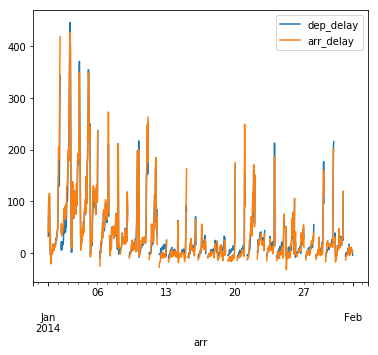

In [80]:
delays.plot()

Since `delays.index` is a `DatetimeIndex`, we can use [partial string indexing](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex-partial-string-indexing) to easily select subsets of the data.
The basic idea is to specify the datetime up to whatever resolution you care about.
For example, to select all the flights on the 12th (a daily resolution):

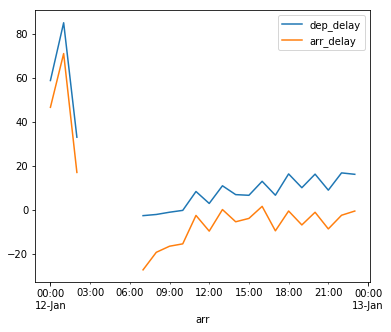

In [83]:
delays.loc['2014-01-12'].plot()

Without partial string indexing, you'd need to do something like

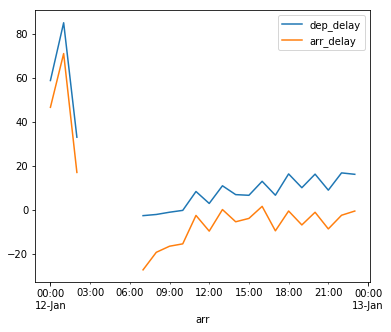

In [84]:
delays[(delays.index.year == 2014) & (delays.index.month == 1) & (delays.index.day == 12)].plot()

In [87]:
#Slice `delays` to select all rows from 12:00 on January 3rd, to 12:00 on the 10th.
delays.loc['2014-01-03T12':'2014-01-10T12']

,dep_delay,arr_delay
arr,,
2014-01-03 12:00:00,131.00,138.17
2014-01-03 13:00:00,87.77,96.15
2014-01-03 14:00:00,67.12,68.19
2014-01-03 15:00:00,119.12,120.92
2014-01-03 16:00:00,93.74,93.11
...,...,...
2014-01-10 08:00:00,0.07,6.22
2014-01-10 09:00:00,3.00,7.74
2014-01-10 10:00:00,8.87,10.53


### Alignment

- Working with multiple pandas objects
- Structuring your data to make analysis easier
- Using labels to their full potential

Alignment is a key part of many parts of pandas, including

- binary operations (`+, -, *, /, **, ==, |, &`) between pandas objects
- merges / joins / concats
- constructors (`pd.DataFrame`, `pd.Series`)
- reindexing

##### An example
Data on nominal US GDP (total output each quarter) and CPI (a measure of inflation).
Each CSV has a column of dates, and a column for the measurement.

Supose we wish to compute Real GDP:

- nomial GDP: Total output in dollars
- real GDP: Total output in constant dollars
- $\mathrm{real\ gdp} = \frac{\mathrm{nomial\ gdp}}{\mathrm{inflation}}$

In [140]:
gdp = pd.read_csv("../extras/sample_data/gdp.csv", parse_dates=['DATE'])
cpi = pd.read_csv("../extras/sample_data/cpi.csv", parse_dates=['DATE'])

In [91]:
gdp

,DATE,GDP
0,1947-01-01,243.10
1,1947-04-01,246.30
2,1947-07-01,250.10
3,1947-10-01,260.30
4,1948-01-01,266.20
...,...,...
264,2013-01-01,"16,475.40"
265,2013-04-01,"16,541.40"
266,2013-07-01,"16,749.30"
267,2013-10-01,"16,999.90"


In [92]:
cpi

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95
...,...,...
816,2015-01-01,234.95
817,2015-02-01,235.41
818,2015-03-01,235.86
819,2015-04-01,236.20


pd.merge(left, right, how='inner', on=None, ...)

Docstring:
Merge DataFrame objects by performing a database-style join operation by
columns or indexes.

If joining columns on columns, the DataFrame indexes *will be
ignored*. Otherwise if joining indexes on indexes or indexes on a column or
columns, the index will be passed on.

Parameters:
left : DataFrame

right : DataFrame

how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order
    * outer: use union of keys from both frames, similar to a SQL full outer
      join; sort keys lexicographically
    * inner: use intersection of keys from both frames, similar to a SQL inner
      join; preserve the order of the left keys

on : label or list
    Column or index level names to join on. These must be found in both
    DataFrames. If `on` is None and not merging on indexes then this defaults
    to the intersection of the columns in both DataFrames.
...

In [93]:
# merge on DATE, divide
m = pd.merge(gdp, cpi, on='DATE', how='inner')
m

,DATE,GDP,CPIAUCSL
0,1947-01-01,243.10,21.48
1,1947-04-01,246.30,22.00
2,1947-07-01,250.10,22.23
3,1947-10-01,260.30,22.91
4,1948-01-01,266.20,23.68
...,...,...,...
264,2013-01-01,"16,475.40",231.64
265,2013-04-01,"16,541.40",231.86
266,2013-07-01,"16,749.30",232.75
267,2013-10-01,"16,999.90",233.80


In [94]:
m['Real_GDP'] = m['GDP'] / m['CPIAUCSL']

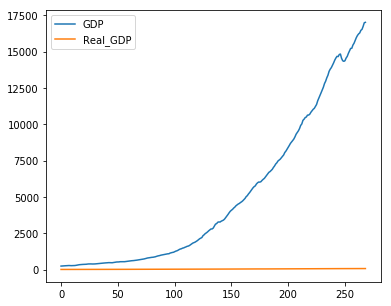

In [97]:
m[['GDP','Real_GDP']].plot()

In [101]:
m.set_index('DATE',inplace=True)

In [102]:
m

,GDP,CPIAUCSL,Real_GDP
DATE,,,
1947-01-01,243.10,21.48,11.32
1947-04-01,246.30,22.00,11.20
1947-07-01,250.10,22.23,11.25
1947-10-01,260.30,22.91,11.36
1948-01-01,266.20,23.68,11.24
...,...,...,...
2013-01-01,"16,475.40",231.64,71.12
2013-04-01,"16,541.40",231.86,71.34
2013-07-01,"16,749.30",232.75,71.96


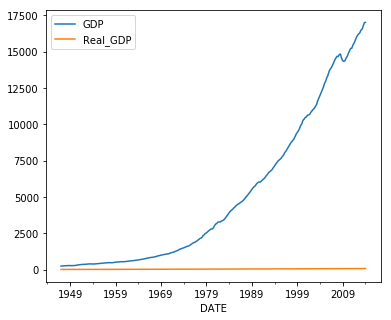

In [106]:
m[['GDP','Real_GDP']].plot()

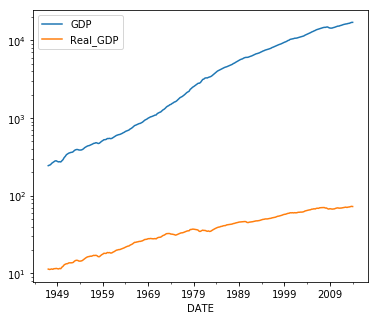

In [107]:
m[['GDP','Real_GDP']].plot(logy=True)

A better way:

In [147]:
# use .squeeze to convert a 1 column df to a Series
gdp = pd.read_csv('../extras/sample_data/gdp.csv', index_col='DATE',
                  parse_dates=['DATE']).squeeze()
cpi = pd.read_csv('../extras/sample_data/cpi.csv', index_col='DATE',
                  parse_dates=['DATE']).squeeze()

In [148]:
real_gdp = gdp/cpi

In [149]:
real_gdp

DATE
1947-01-01   11.32
1947-02-01     nan
1947-03-01     nan
1947-04-01   11.20
1947-05-01     nan
              ... 
2015-01-01     nan
2015-02-01     nan
2015-03-01     nan
2015-04-01     nan
2015-05-01     nan
Length: 821, dtype: float64

You'll notice that a bunch of the values are `NaN`, short for ["Not A Number"](https://en.wikipedia.org/wiki/NaN).
This is the missing value indicator pandas uses for numeric data.
The `NaN`s are there because alignment produces the *union* of the two Indexes.

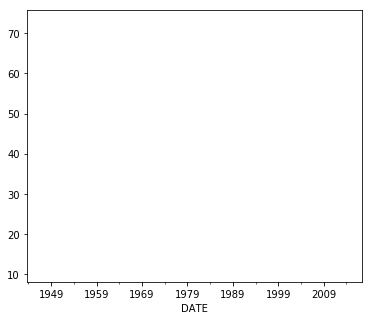

In [132]:
real_gdp.plot()

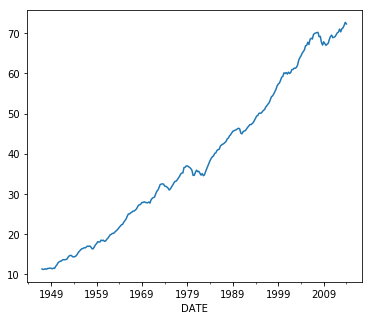

In [117]:
real_gdp.dropna().plot()

#### Detecting Missing Data

1. `pd.isna(), df.isna()`
2. `pd.notna(), df.notana()`

In [150]:
real_gdp.isna()

DATE
1947-01-01    False
1947-02-01     True
1947-03-01     True
1947-04-01    False
1947-05-01     True
              ...  
2015-01-01     True
2015-02-01     True
2015-03-01     True
2015-04-01     True
2015-05-01     True
Length: 821, dtype: bool

In [152]:
real_gdp.notna()

DATE
1947-01-01     True
1947-02-01    False
1947-03-01    False
1947-04-01     True
1947-05-01    False
              ...  
2015-01-01    False
2015-02-01    False
2015-03-01    False
2015-04-01    False
2015-05-01    False
Length: 821, dtype: bool

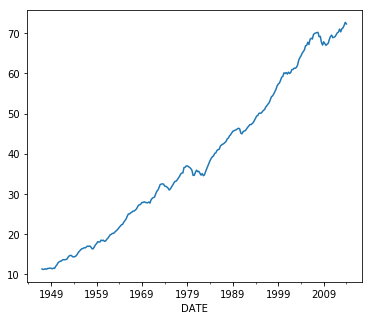

In [154]:
real_gdp[real_gdp.notna()].plot()

In [155]:
real_gdp.isna().sum()

552

#### Dropping Missing Data

You can drop missing values with `.dropna`

```
DataFrame.dropna

Return object with labels on given axis omitted where
alternately any or all of the data are missing

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, or tuple/list thereof
    Pass tuple or list to drop on multiple axes
how : {'any', 'all'}
    * any : if any NA values are present, drop that label
    * all : if all values are NA, drop that label
```

In [157]:
real_gdp.dropna()

DATE
1947-01-01   11.32
1947-04-01   11.20
1947-07-01   11.25
1947-10-01   11.36
1948-01-01   11.24
              ... 
2013-01-01   71.12
2013-04-01   71.34
2013-07-01   71.96
2013-10-01   72.71
2014-01-01   72.31
Length: 269, dtype: float64

#### Dropna for DataFrames

Since `DataFrame` is a 2-d container, there are additional complexities with dropping missing data.
- Do you drop the row or column? 
- Does just one value in the row or column have to be missing, or all of them?

In [160]:
# We'll see concat later
df = pd.concat([gdp, cpi], axis='columns')
df

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-02-01,nan,21.62
1947-03-01,nan,22.00
1947-04-01,246.30,22.00
1947-05-01,nan,21.95
...,...,...
2015-01-01,nan,234.95
2015-02-01,nan,235.41
2015-03-01,nan,235.86


The defaults, shown next, are to drop *rows* (`axis='index'`) that
have at any missing values (`how='any'`):

In [161]:
df.dropna()

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-04-01,246.30,22.00
1947-07-01,250.10,22.23
1947-10-01,260.30,22.91
1948-01-01,266.20,23.68
...,...,...
2013-01-01,"16,475.40",231.64
2013-04-01,"16,541.40",231.86
2013-07-01,"16,749.30",232.75


In [162]:
df.dropna(how='all')

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-02-01,nan,21.62
1947-03-01,nan,22.00
1947-04-01,246.30,22.00
1947-05-01,nan,21.95
...,...,...
2015-01-01,nan,234.95
2015-02-01,nan,235.41
2015-03-01,nan,235.86


Drop any `columns` in `df` that have at least one missing value

In [164]:
df.dropna(axis="columns")

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
...,...
2015-01-01,234.95
2015-02-01,235.41
2015-03-01,235.86


#### Filling Missing Values

Use `.fillna` to fill with a value (scalar, or mapping of `label: value`) or method.

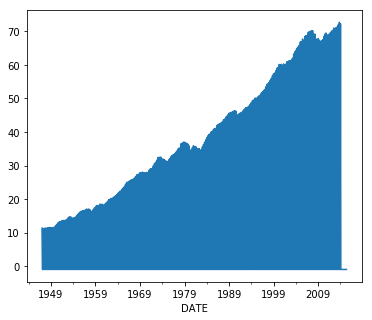

In [169]:
real_gdp.fillna(-1).plot()

```
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use NEXT valid observation to fill gap
```

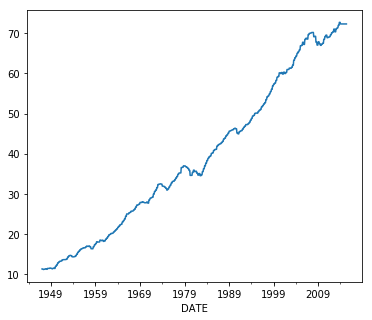

In [171]:
real_gdp.fillna(method='pad').plot()

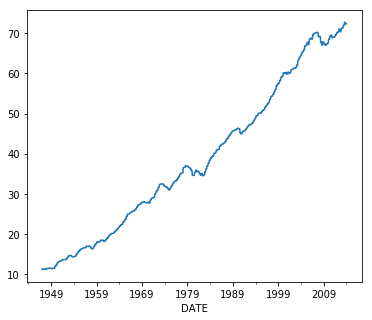

In [172]:
real_gdp.fillna(method='backfill').plot()

#### Joining Pandas Objects

You have some options:

1. `pd.merge`: SQL-style joins
2. `pd.concat`: array-style joins

You'll run into problems where you have multiple `Series` or `DataFrame`s, that you want to join into a single `DataFrame`.
We saw an example of this earlier, but let's follow it up as a pair of exercises.

There are two main ways to do this, `pd.merge` and `pd.concat`.

When to use `merge` vs. `concat`?
- use `concat` for one-to-one joins of two or more Series/DataFrames, where your joining on the index.
- use `pd.merge` when doing database style joins that are one-to-many, or many-to-many, or whenever you're joining on a column.

In [181]:
pd.merge(gdp_, cpi_, on="DATE", how='left')

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-04-01,246.30,22.00
1947-07-01,250.10,22.23
1947-10-01,260.30,22.91
1948-01-01,266.20,23.68
...,...,...
2013-01-01,"16,475.40",231.64
2013-04-01,"16,541.40",231.86
2013-07-01,"16,749.30",232.75


In [182]:
pd.merge(gdp_, cpi_, on="DATE", how='right')

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-04-01,246.30,22.00
1947-07-01,250.10,22.23
1947-10-01,260.30,22.91
1948-01-01,266.20,23.68
...,...,...
2015-01-01,nan,234.95
2015-02-01,nan,235.41
2015-03-01,nan,235.86


In [190]:
pd.concat([gdp_, cpi_])

/Users/hvribeiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,CPIAUCSL,GDP
DATE,,
1947-01-01,nan,243.10
1947-04-01,nan,246.30
1947-07-01,nan,250.10
1947-10-01,nan,260.30
1948-01-01,nan,266.20
...,...,...
2015-01-01,234.95,nan
2015-02-01,235.41,nan
2015-03-01,235.86,nan


In [189]:
pd.concat([gdp_, cpi_],axis=1)

,GDP,CPIAUCSL
DATE,,
1947-01-01,243.10,21.48
1947-02-01,nan,21.62
1947-03-01,nan,22.00
1947-04-01,246.30,22.00
1947-05-01,nan,21.95
...,...,...
2015-01-01,nan,234.95
2015-02-01,nan,235.41
2015-03-01,nan,235.86


#### ufuncs

NumPy has the concept of [universal functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) (ufuncs) that operate on any sized array.

In [191]:
df = pd.concat([gdp_, cpi_],axis=1)

In [192]:
np.log(df)

,GDP,CPIAUCSL
DATE,,
1947-01-01,5.49,3.07
1947-02-01,nan,3.07
1947-03-01,nan,3.09
1947-04-01,5.51,3.09
1947-05-01,nan,3.09
...,...,...
2015-01-01,nan,5.46
2015-02-01,nan,5.46
2015-03-01,nan,5.46


In [193]:
df+10

,GDP,CPIAUCSL
DATE,,
1947-01-01,253.10,31.48
1947-02-01,nan,31.62
1947-03-01,nan,32.00
1947-04-01,256.30,32.00
1947-05-01,nan,31.95
...,...,...
2015-01-01,nan,244.95
2015-02-01,nan,245.41
2015-03-01,nan,245.86


#### Reductions
`DataFrame` has many methods that *reduce* a DataFrame to a Series by aggregating over a dimension.
Likewise, `Series` has many methods that collapse down to a scalar.
Some examples are `.mean`, `.std`, `.max`, `.any`, `.all`.

In [198]:
df.sort_values(by='DATE', inplace=True)

In [200]:
pct_change = df.dropna().pct_change()

The `pct_change` method returns the `(current - previous) / previous` for each row (with `NaN` for the first since there isn't a previous.

In [201]:
pct_change

,GDP,CPIAUCSL
DATE,,
1947-01-01,nan,nan
1947-04-01,0.01,0.02
1947-07-01,0.02,0.01
1947-10-01,0.04,0.03
1948-01-01,0.02,0.03
...,...,...
2013-01-01,0.01,-0.00
2013-04-01,0.00,0.00
2013-07-01,0.01,0.00


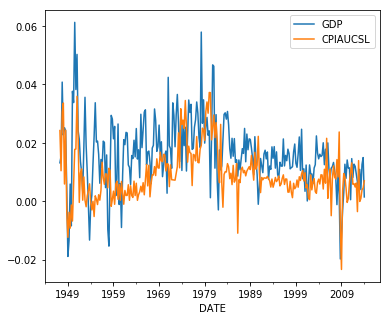

In [202]:
pct_change.plot()

In [206]:
pct_change.mean()

GDP        0.02
CPIAUCSL   0.01
dtype: float64

In [205]:
pct_change.std()

GDP        0.01
CPIAUCSL   0.01
dtype: float64

In [207]:
pct_change.max()

GDP        0.06
CPIAUCSL   0.04
dtype: float64

In [208]:
pct_change.max(axis=1)

DATE
1947-01-01    nan
1947-04-01   0.02
1947-07-01   0.02
1947-10-01   0.04
1948-01-01   0.03
             ... 
2013-01-01   0.01
2013-04-01   0.00
2013-07-01   0.01
2013-10-01   0.01
2014-01-01   0.01
Freq: 3MS, Length: 269, dtype: float64

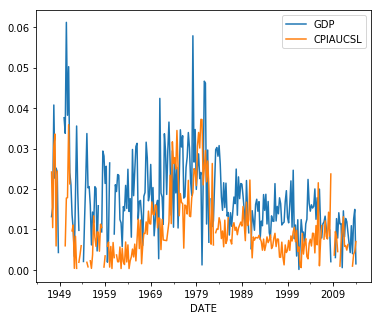

In [209]:
pct_change[pct_change>0].plot()

In [210]:
pct_change[pct_change>0].mean()

GDP        0.02
CPIAUCSL   0.01
dtype: float64

In [211]:
pct_change[pct_change<0].mean()

GDP        -0.01
CPIAUCSL   -0.00
dtype: float64

## Groupby

Groupby operations come up in a lot of contexts.
At its root, groupby about doing an operation on many subsets of the data, each of which shares something in common.
The components of a groupby operation are:

In [215]:
df = pd.read_csv("../extras/sample_data/subset.csv.gz", compression="gzip",
                 parse_dates=['time'])
df

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,5.30,93,33,Steel Rail Extra Pale Ale,American Pale Ale (APA),3.50,3.50,4.00,4.00,Todd,4.00,"Presentation: Pint size, on tap from the Easts...",1996-08-22 00:00:01
1,17.50,111,35,Samuel Adams Triple Bock,American Strong Ale,3.00,4.00,4.00,4.50,Todd,4.50,Presentation: 8.45oz blue bottle with gold let...,1998-01-10 00:00:01
2,nan,110,35,Samuel Adams Cream Ale,Cream Ale,4.50,4.00,4.50,4.00,Jason,4.50,Presentation: Pint. On tap at the Samuel Adams...,1998-01-28 00:00:01
3,5.20,148,45,Brooklyn Lager,American Amber / Red Lager,3.00,2.50,4.00,3.50,Todd,3.50,Presentation: 12 oz. brown bottle with a clear...,1998-02-11 00:00:01
4,5.60,325,100,McNeill's Firehouse Amber Ale,American Amber / Red Ale,3.50,3.50,4.00,3.50,Todd,4.00,Presentation: An old picture of firehouse with...,1998-02-14 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,nan,24035,1177,Galena Pale Ale,American Pale Ale (APA),4.00,4.00,4.00,4.50,feloniousmonk,4.50,"Clear, coppery/ amber hue, good, creamy dollop...",2005-06-02 01:31:22
76010,9.00,15102,1675,Noël Baladin,Belgian Strong Dark Ale,5.00,4.00,4.50,4.50,alexgash,4.50,Dark leathery brown murk that almost looks lik...,2005-06-02 01:36:36
76011,8.40,6407,454,Arcadia Imperial Stout,Russian Imperial Stout,4.50,3.50,5.00,4.00,kmpitz2,4.50,This brew pours a very dark black color with a...,2005-06-02 01:53:45
76012,8.50,23495,147,Stone 05.05.05 Vertical Epic Ale,Belgian Strong Dark Ale,4.50,5.00,4.50,4.50,mzwolinski,4.50,This is a tough nut to crack. Dark brown in co...,2005-06-02 02:00:37


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 13 columns):
abv                  68126 non-null float64
beer_id              76014 non-null int64
brewer_id            76014 non-null int64
beer_name            76014 non-null object
beer_style           76014 non-null object
review_appearance    76014 non-null float64
review_aroma         76014 non-null float64
review_overall       76014 non-null float64
review_palate        76014 non-null float64
profile_name         76014 non-null object
review_taste         76014 non-null float64
text                 76014 non-null object
time                 76014 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 7.5+ MB


In [217]:
gr = df.groupby("beer_name")
gr

We haven't really done any actual work yet, but pandas knows what it needs to know to break the larger `df` into many smaller pieces, one for each distinct `beer_name`.

To finish the groupby, we apply a method to the groupby object.

In [218]:
review_cols = ['review_appearance', 'review_aroma', 'review_overall',
               'review_palate', 'review_taste']

df.groupby('beer_name')[review_cols].agg('mean')

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.00,3.50,4.00,3.50,3.50
"""Alt""ered State",4.00,3.75,3.50,4.00,4.00
"""Double Wrecked Wreck"" IPA",3.25,3.75,4.00,4.00,3.75
"""Marnie"" Gras Carnival Ale",3.67,4.33,3.83,4.00,4.00
"""Old Yeltsin"" Imperial Stout",4.18,4.09,3.68,3.88,3.97
...,...,...,...,...,...
Öko Ur-Weizen,3.75,4.00,3.50,3.25,3.50
Öko Urtrunk,4.00,4.00,4.50,4.00,4.00
Ölsch,4.00,4.00,4.50,4.00,4.50


In this case, the function we applied was `'mean'`.
Pandas has implemented cythonized versions of certain common methods like mean, sum, etc.
You can also pass in regular functions like `np.mean`.

In terms of split, apply, combine, split was `df.groupby('beer_name')`. 
We apply the `mean` function by passing in `'mean'`.
Finally, by using the `.agg` method (for aggregate) we tell pandas to combine the results with one output row per group.

You can also pass in regular functions like `np.mean`.

In [219]:
df.groupby('beer_name')[review_cols].agg(np.mean).head()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.00,3.50,4.00,3.50,3.50
"""Alt""ered State",4.00,3.75,3.50,4.00,4.00
"""Double Wrecked Wreck"" IPA",3.25,3.75,4.00,4.00,3.75
"""Marnie"" Gras Carnival Ale",3.67,4.33,3.83,4.00,4.00
"""Old Yeltsin"" Imperial Stout",4.18,4.09,3.68,3.88,3.97


Finally, [certain methods](http://pandas.pydata.org/pandas-docs/stable/api.html#id35) have been attached to `Groupby` objects.

In [220]:
df.groupby('beer_name')[review_cols].mean()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_name,,,,,
"""50"" Golden Anniversary Lager",5.00,3.50,4.00,3.50,3.50
"""Alt""ered State",4.00,3.75,3.50,4.00,4.00
"""Double Wrecked Wreck"" IPA",3.25,3.75,4.00,4.00,3.75
"""Marnie"" Gras Carnival Ale",3.67,4.33,3.83,4.00,4.00
"""Old Yeltsin"" Imperial Stout",4.18,4.09,3.68,3.88,3.97
...,...,...,...,...,...
Öko Ur-Weizen,3.75,4.00,3.50,3.25,3.50
Öko Urtrunk,4.00,4.00,4.50,4.00,4.00
Ölsch,4.00,4.00,4.50,4.00,4.50


Find the `beer_style`s with the greatest variance in `abv`.

In [222]:
df.groupby('beer_style').abv.std().sort_values(ascending=False)

beer_style
American Double / Imperial Stout   3.70
American Strong Ale                3.23
Braggot                            2.62
American Double / Imperial IPA     2.11
Old Ale                            2.03
                                   ... 
Bière de Champagne / Bière Brut    0.24
Roggenbier                         0.23
Japanese Rice Lager                0.17
Gose                               0.07
American Black Ale                 0.00
Name: abv, Length: 103, dtype: float64

#### `.agg` output shape

The output shape is determined by the grouper, data, and aggregation

- Grouper: Controls the output index
    * single grouper -> Index
    * array-like grouper -> MultiIndex
- Subject (Groupee): Controls the output data values
    * single column -> Series (or DataFrame if multiple aggregations)
    * multiple columns -> DataFrame
- Aggregation: Controls the output columns
    * single aggfunc -> Index in the colums
    * multiple aggfuncs -> MultiIndex in the columns (Or 1-D Index if groupee is 1-D)

In [223]:
# single grouper, single groupee, single aggregation
df.groupby('beer_style').review_overall.agg('mean')

beer_style
Altbier                      3.84
American Adjunct Lager       2.71
American Amber / Red Ale     3.74
American Amber / Red Lager   3.46
American Barleywine          4.01
                             ... 
Vienna Lager                 3.70
Weizenbock                   4.04
Wheatwine                    4.01
Winter Warmer                3.79
Witbier                      3.89
Name: review_overall, Length: 103, dtype: float64

In [234]:
df.groupby('beer_style').review_overall.agg({'mean': np.mean, 'median': np.median,'5%': lambda x: np.percentile(x,5/2), '95%': lambda x: np.percentile(x,(100-5)/2)})

/Users/hvribeiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,median,5%,95%
beer_style,,,,
Altbier,3.84,4.00,2.00,4.00
American Adjunct Lager,2.71,3.00,1.00,2.50
American Amber / Red Ale,3.74,4.00,2.00,4.00
American Amber / Red Lager,3.46,3.50,1.50,3.50
American Barleywine,4.01,4.00,2.50,4.00
...,...,...,...,...
Vienna Lager,3.70,4.00,2.00,4.00
Weizenbock,4.04,4.00,2.50,4.00
Wheatwine,4.01,4.00,2.91,4.00


Plot the relationship between review length (number of characters) and average `review_overall`.

In [243]:
df['text_len'] = df['text'].str.len()

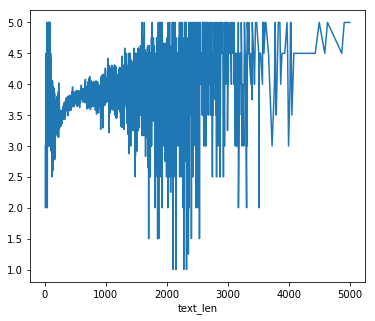

In [247]:
df.groupby('text_len').review_overall.mean().plot()

Find the relationship between the number of reviews for a beer and the average `review_overall`.

In [251]:
df.groupby('beer_id').review_overall.agg(['mean', 'count'])

,mean,count
beer_id,,
3,4.00,2
4,3.90,5
5,3.39,38
6,3.69,52
7,3.21,40
...,...,...
57341,4.50,3
57492,3.75,2
59382,3.72,18


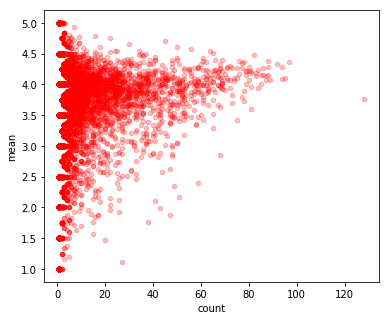

In [253]:
(df.groupby('beer_id')
   .review_overall
   .agg(['mean', 'count'])
   .plot.scatter(x='count', y='mean', color='red',
                 marker='o', alpha=.25))